In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.ticker import FormatStrFormatter, StrMethodFormatter
%matplotlib inline


In [7]:
df_posts = pd.read_csv('../data/senti_posts.zip').drop(6161) # bad row
df_posts['timestamp'] = pd.to_datetime(df_posts['timestamp'])
df_posts['score'] = pd.to_numeric(df_posts['score'])
df_posts['hour_day'] = pd.to_datetime(df_posts['timestamp'].dt.strftime('%Y-%m-%dT%H'))

df_posts = df_posts[df_posts['hour_day'] >= '2021-01-29']


In [8]:
df_comments = pd.read_csv('../data/senti_comments.zip', lineterminator='\n') \
    .merge(df_posts[['id', 'hour_day']], left_on='id_col', right_on='id') \
    .drop('id', axis=1)

df_comments = df_comments[df_comments['hour_day'] >= '2021-01-29']

In [4]:
df_comments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1359440 entries, 0 to 1359439
Data columns (total 6 columns):
 #   Column      Non-Null Count    Dtype         
---  ------      --------------    -----         
 0   id_col      1359440 non-null  object        
 1   comments    1359440 non-null  object        
 2   score       1359440 non-null  float64       
 3   sent_label  1359440 non-null  object        
 4   sent_score  1359440 non-null  float64       
 5   hour_day    1359439 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(2), object(3)
memory usage: 62.2+ MB


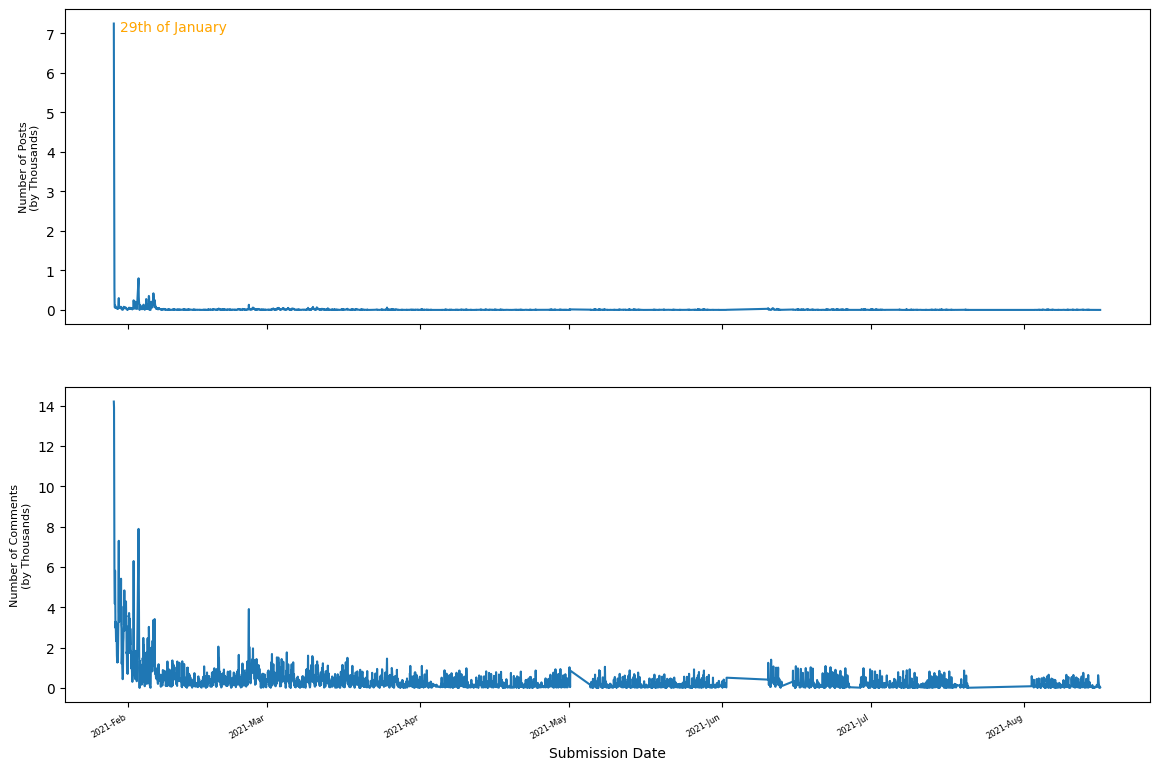

In [9]:
col_name = ['hour_day', 'count']

num_posts = df_posts.groupby('hour_day')['id'].nunique().reset_index()
num_posts.columns = col_name

num_comments = df_comments.groupby('hour_day').size().to_frame().reset_index()
num_comments.columns = col_name

day_of_squeeze = num_posts[num_posts['count']==np.max(num_posts['count'])]['hour_day'].to_list()[0]
peak_comments = num_comments[num_comments['count']>=np.max(num_comments['count'])]['hour_day'].to_list()[0]

plt.rcParams["figure.figsize"] = [14,9]
fig, ax = plt.subplots(2,1, sharex = True)

ax[0].plot(num_posts['hour_day'], num_posts['count']/1000)
ax[0].set_ylabel('Number of Posts\n(by Thousands)', fontsize=8)
ax[0].annotate('29th of January', xy=(day_of_squeeze, np.max(num_posts['count']/1000)),
               xytext=(4.5, -5.5), textcoords='offset points', color='orange')
ax[1].plot(num_comments['hour_day'], num_comments['count']/1000)
ax[1].set_ylabel('Number of Comments\n(by Thousands)', fontsize=8)
ax[1].set_xlabel('Submission Date')
ax[1].xaxis.set_major_formatter(mdates.DateFormatter('%Y-%b'))

plt.xticks(fontsize=6)
for label in ax[1].get_xticklabels(which='major'):
    label.set(rotation=30, horizontalalignment='right');

In [101]:
df_posts[df_posts['comms_num']==np.max(df_posts['comms_num'])]

,title,score,id,url,comms_num,created,body,timestamp,sent_label,sent_score,hour_day
39994,"GME Megathread for March 10, 2021",47667,m1xhlc,https://www.reddit.com/r/wallstreetbets/commen...,93268.0,1.615412e+09,HOLYMOLYHOLYMOLYHOLYMOLYHOLYMOLYHOLYMOLYHOLYMO...,2021-03-10 23:30:11,positive,0.993393,2021-03-10 23:00:00


In [124]:
df_posts.info()

<class 'pandas.core.frame.DataFrame'>
Index: 53187 entries, 0 to 53187
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   title       53181 non-null  object        
 1   score       53187 non-null  int64         
 2   id          53187 non-null  object        
 3   url         53187 non-null  object        
 4   comms_num   53187 non-null  float64       
 5   created     53187 non-null  float64       
 6   body        24606 non-null  object        
 7   timestamp   53186 non-null  datetime64[ns]
 8   sent_label  53186 non-null  object        
 9   sent_score  53186 non-null  float64       
 10  hour_day    53186 non-null  datetime64[ns]
dtypes: datetime64[ns](2), float64(3), int64(1), object(5)
memory usage: 4.9+ MB


In [104]:
id_posts_21_may = df_posts[df_posts['hour_day']==peak_comments]['id']
df_comm_21_may = df_comments[df_comments['id_col'].isin(id_posts_21_may)]

In [106]:
col_nums = df_comm_21_may.groupby('id_col')['comments'].nunique().reset_index()

In [107]:
col_nums

,id_col,comments
0,nh72em,118
1,nh81w4,60
2,nh8f2j,30
3,nh8frn,13


In [108]:
df_posts[df_posts['hour_day']==peak_comments][['id', 'comms_num']]

,id,comms_num
47423,nh8frn,22.0
47424,nh8f2j,53.0
47425,nh81w4,219.0
47426,nh72em,407.0


In [90]:
peak_posts = num_posts[num_posts['count']==np.max(num_posts['count'])]['hour_day'].to_list()[0]
peak_comments = num_comments[num_comments['count']>=np.max(num_comments['count'])]['hour_day'].to_list()[0]

peak_comments

Timestamp('2021-05-21 05:00:00')

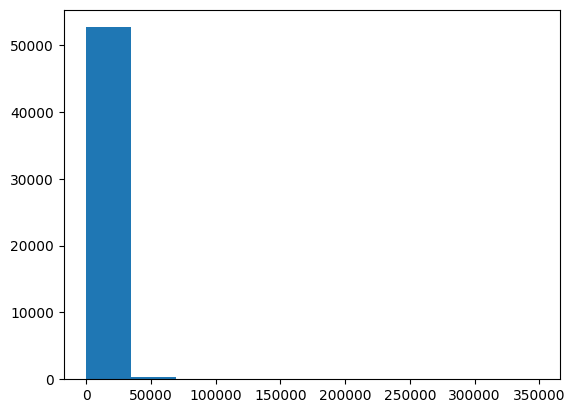

In [23]:
fig, ax = plt.subplots(1,1)
ax.hist(df_posts['score']);

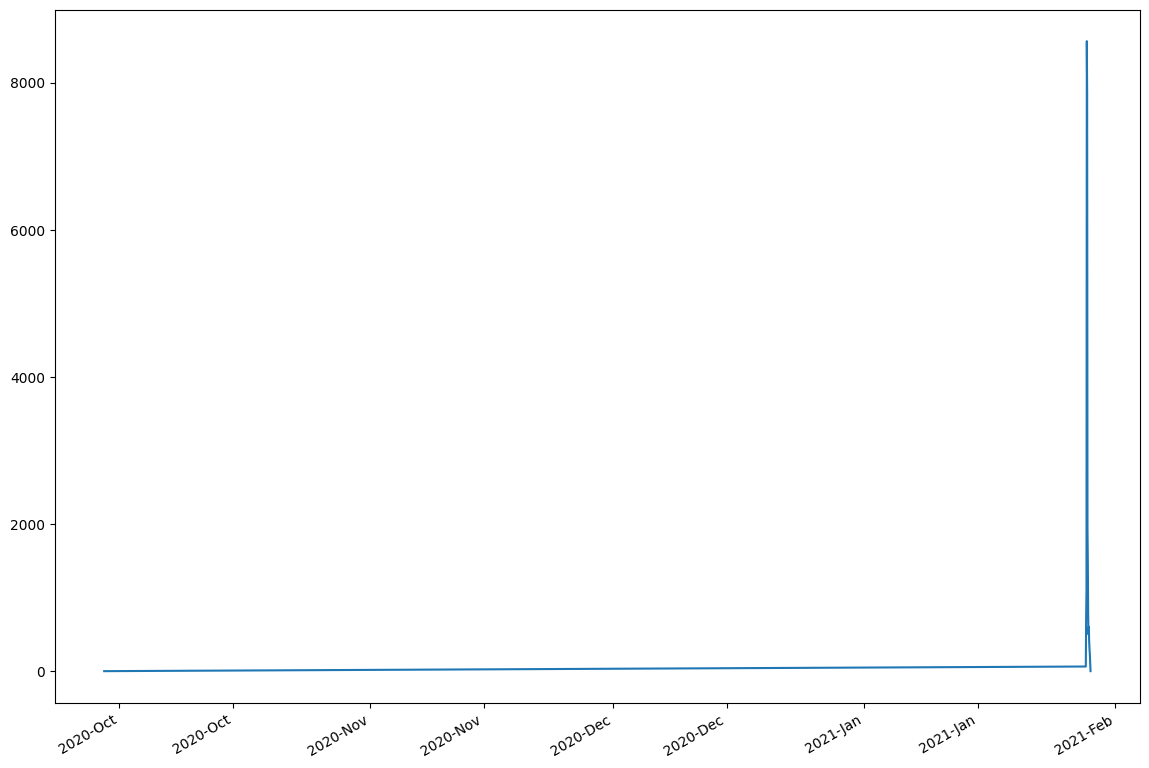

In [127]:
# Upvote count
score_m = df_posts.groupby('hour_day')['score'].agg(np.median).to_frame().reset_index()

score_m = score_m[score_m['hour_day'] < '2021-01-29']

fig, ax = plt.subplots(1,1)

ax.plot(score_m['hour_day'], score_m['score'])
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%b'))

for label in ax.get_xticklabels(which='major'):
    label.set(rotation=30, horizontalalignment='right');

In [128]:
score_m

,hour_day,score
0,2020-09-29 03:00:00,4.0
1,2021-01-28 09:00:00,67.0
2,2021-01-28 10:00:00,748.5
3,2021-01-28 11:00:00,1091.0
4,2021-01-28 12:00:00,8563.0
5,2021-01-28 13:00:00,7847.0
6,2021-01-28 14:00:00,1944.0
7,2021-01-28 15:00:00,1485.5
8,2021-01-28 16:00:00,775.0
9,2021-01-28 17:00:00,503.0


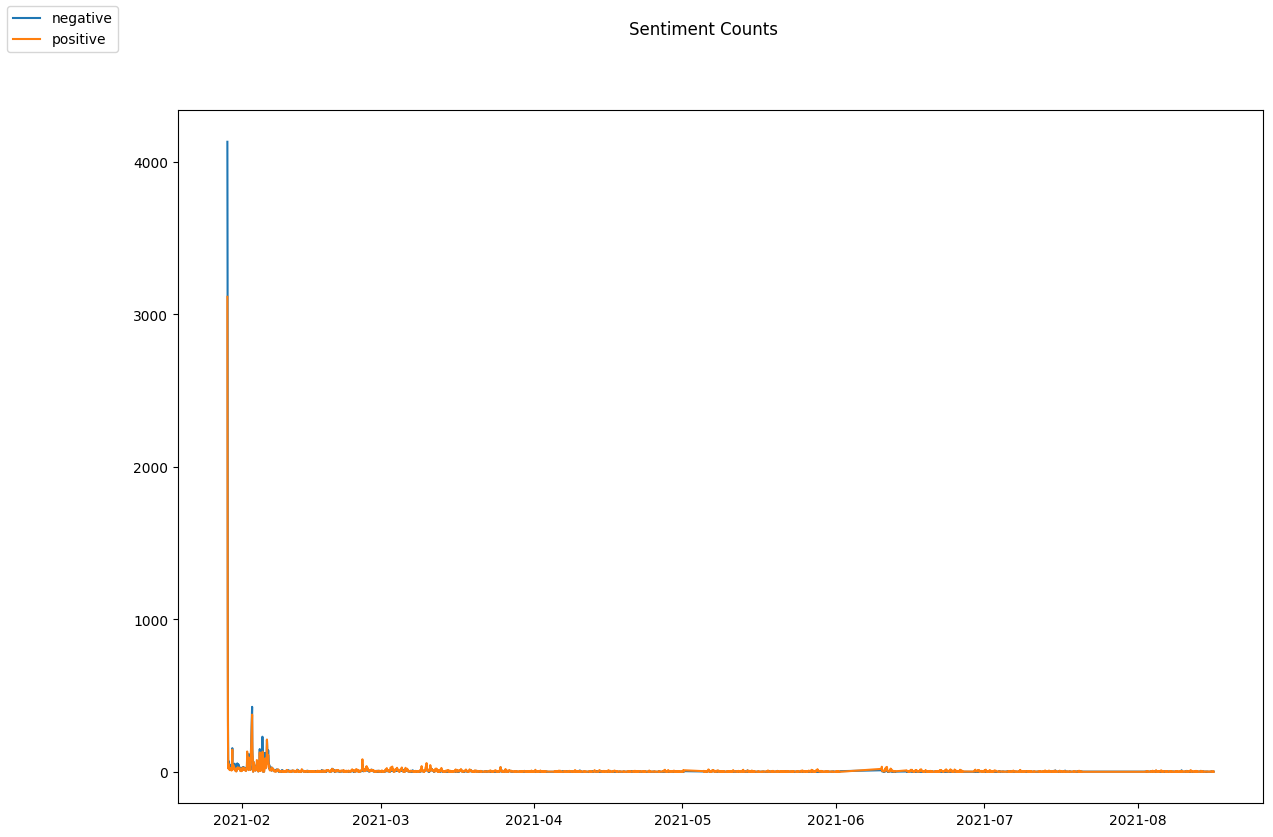

In [10]:
sent_date = df_posts.groupby(['hour_day', 'sent_label']).size().to_frame('size').reset_index()\
            .pivot(index='hour_day',columns='sent_label', values='size').reset_index().fillna('0')

sent_date[['negative', 'positive']] = sent_date[['negative', 'positive']].astype('int32')

fig, ax = plt.subplots(1, 1)
for col in ['negative', 'positive']:
    ax.plot(sent_date['hour_day'], sent_date[col], label=col)

fig.legend(loc='upper left')
fig.suptitle('Sentiment Counts');

In [12]:
sent_date

sent_label,hour_day,negative,positive,tot
0,2021-01-29 01:00:00,0.570148,0.429852,7249
1,2021-01-29 02:00:00,0.645804,0.354196,5017
2,2021-01-29 03:00:00,0.624715,0.375285,1756
3,2021-01-29 04:00:00,0.614391,0.385609,542
4,2021-01-29 05:00:00,0.672000,0.328000,125
...,...,...,...,...
3575,2021-08-16 05:00:00,0.000000,1.000000,3
3576,2021-08-16 06:00:00,0.500000,0.500000,2
3577,2021-08-16 07:00:00,0.333333,0.666667,3
3578,2021-08-16 08:00:00,1.000000,0.000000,1


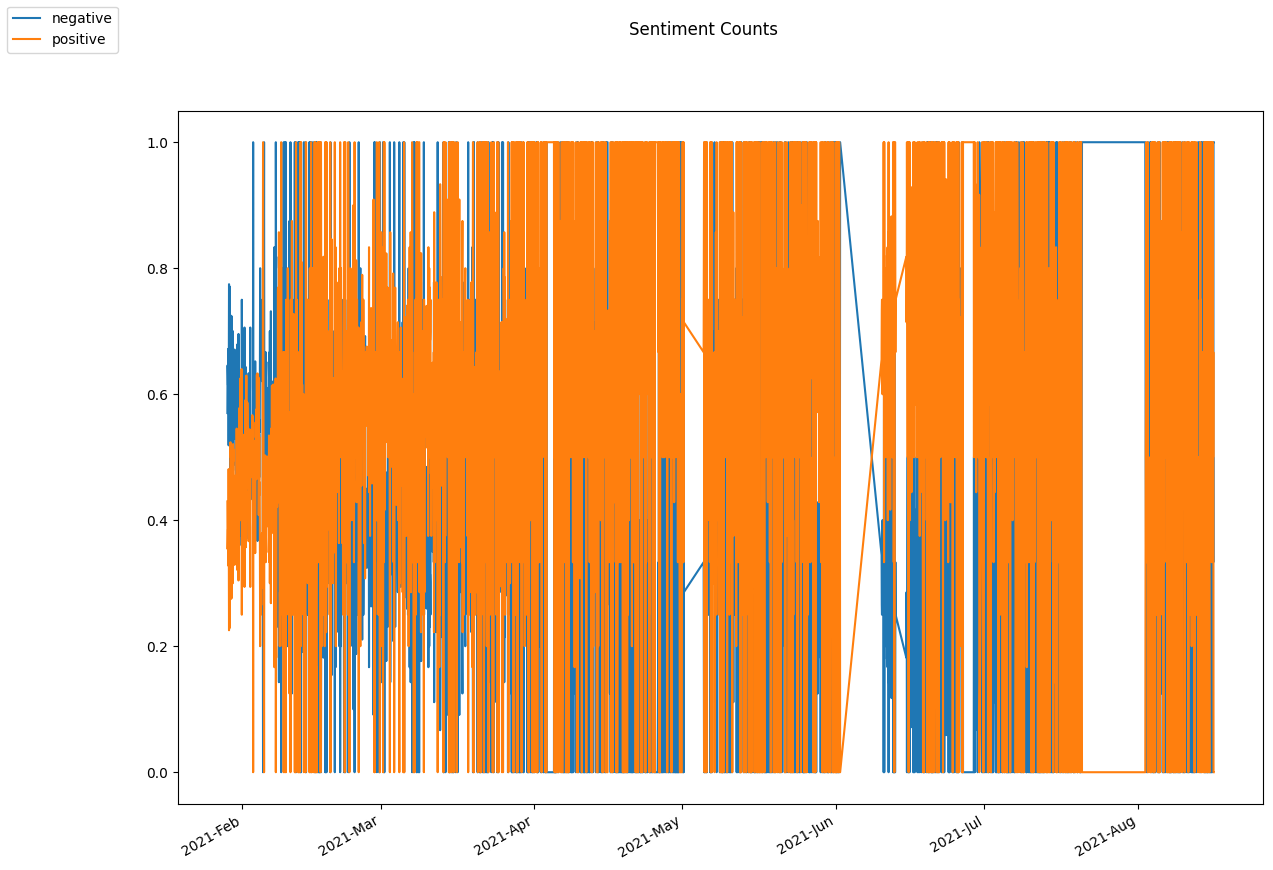

In [11]:
sent_date['tot'] = sent_date['negative'] + sent_date['positive']
sent_date['negative'] = sent_date['negative']/sent_date['tot']
sent_date['positive'] = sent_date['positive']/sent_date['tot']

fig, ax = plt.subplots(1, 1)
for col in ['negative', 'positive']:
    ax.plot(sent_date['hour_day'], sent_date[col], label=col)

ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%b'))
for label in ax.get_xticklabels(which='major'):
    label.set(rotation=30, horizontalalignment='right')
fig.legend(loc='upper left')
fig.suptitle('Sentiment Counts');

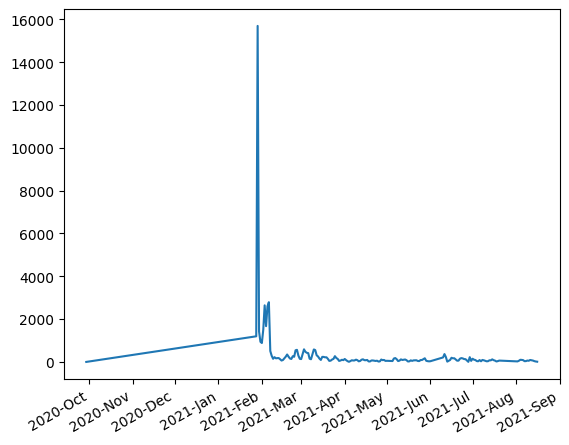